In [1]:
import numpy as np
import random

In [2]:
import pylab as pl
from IPython import display

In [3]:
'''We introduce the UCB bandit as an object'''
class UCB_Bandit:
    # We give the bandit a probability and Parameter alpha
    def __init__(self,prob,alpha=3.):
        self.prob = prob
        self.alpha = alpha
        self.wins , self.losses = 0. , 0.
        self.UCB = np.inf
        
    # we pull from the arm
    def pull(self):
        if random.random() < self.prob :
            self.wins += 1
            return 1.
        else:
            self.losses += 1        
            return 0.
       
    #As before with sample, but now with upper confidence
    def sample(self,time): 
        self.UCB = self.wins/(self.wins+self.losses) \
                    + 2 * ( ( np.log(time+1) ) * ( self.alpha ) / (self.wins+self.losses)  )**(1./2)\
                    if (self.wins+self.losses) != 0 else np.inf
        return self.UCB

In [4]:
'''We calculate the largest Confidence Bound'''
def UCB_Sample(bandits,time):

    for bandit in bandits: 
        bandit.sample(time)
    
    # Pull the biggest sample
    Samples = [bandit.UCB for bandit in bandits] 
    winner_index = np.argmax(Samples)
    reward=bandits[winner_index].pull()
    
    return reward

In [5]:
if __name__ == "__main__":
    
    '''Initialize the bandits and number of rounds'''
    bandits = [UCB_Bandit(0.1*t) for t in range(10)]
    #bandits = [UCB_Bandit(0.55) , UCB_Bandit(0.6)]
    T=1000
    
    '''Initialize the time, rewards and rewards of the bandits'''
    times = None
    rewards = None
    b_rewards = []
    for b in range(len(bandits)):
        b_rewards = np.append(b_rewards,[None],axis=0) 
        
        '''For T rounds play the arms'''
    for t in range(T):
        # collect a list of times
        times = np.concatenate((times,[t]),axis=0) \
        if times is not None else [t]
        # collect a list of Thompson Sample Rewards
        rewards = np.concatenate((rewards,[rewards[-1]+UCB_Sample(bandits,t)]),axis=0) \
        if rewards is not None else [UCB_Sample(bandits,t)]

        # collect a list of rewards to date
        for b in range(len(bandits)):            
            b_rewards[b] = np.concatenate((b_rewards[b],[bandits[b].wins]),axis=0) \
            if b_rewards[b] is not None else [bandits[b].wins]
        
        



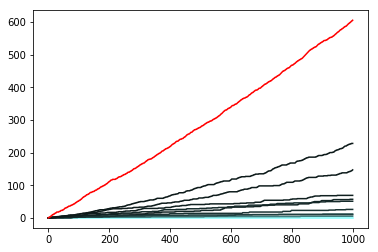

In [6]:
'''Now plot each bandit and the TS rewards'''
display.clear_output()
for b in range(len(bandits)):
    pl.plot(times,b_rewards[b], color=(0.5/(b+1), 1./(b+1),1./(b+1)))
pl.plot(times,rewards, color='r') 
display.display(pl.gcf())
pl.clf()

In [ ]:
# A 2nd test

if __name__ == "__main__":
    
    '''Initialize the bandits and number of rounds'''
    #bandits = [UCB_Bandit(0.45) for t in range(2)]
    bandits = [UCB_Bandit(0.45) , UCB_Bandit(0.55)]
    T=1000
    
    '''Initialize the time, rewards and rewards of the bandits'''
    times = None
    rewards = None
    b_rewards = []
    for b in range(len(bandits)):
        b_rewards = np.append(b_rewards,[None],axis=0) 
        
        '''For T rounds play the arms'''
    for t in range(T):
        # collect a list of times
        times = np.concatenate((times,[t]),axis=0) \
        if times is not None else [t]
        # collect a list of Thompson Sample Rewards
        rewards = np.concatenate((rewards,[rewards[-1]+UCB_Sample(bandits,t)]),axis=0) \
        if rewards is not None else [UCB_Sample(bandits,t)]

        # collect a list of rewards to date
        for b in range(len(bandits)):            
            b_rewards[b] = np.concatenate((b_rewards[b],[bandits[b].wins]),axis=0) \
            if b_rewards[b] is not None else [bandits[b].wins]
        